# Importing and Loading

### Importing relevant libs

In [85]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
sns.set()

### Reading dataset

In [96]:
data_store = pd.read_csv('./data/store.csv') 
data_train = pd.read_csv('./data/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
data_test = pd.read_csv('./data/test.csv', parse_dates = True, low_memory = False, index_col = 'Date')

# Dataset Exploration

## Knowing the data

### Data exploration pipeline

In [46]:
class ExploreData():
    '''Print info, head, shape, missing values of a dataset
    Parameter:
        data DataFrame: pandas dataframe
    '''
    
    def __init__(self, data):
        self.data = data
    
    def __str__(self):
        self.summary()
        return ''
    
    def data(self):
        '''Return the dataset of current instance'''
        return self.data
    
    def summary(self):
        '''print summary of the dataset'''
        self.info()
        self.divider()
        self.head()
        self.divider()
        self.shape()
        self.divider()
        self.missing_values()
    
    def divider(self):
        '''print a horzontal line'''
        display(Markdown('---'))
    
    def info(self):
        '''print a concise summary of a DataFrame'''
        print('\nDataframe summary')
        display(self.data.info())

    def head(self, n=5):
        '''print out the first 5 rows of a dataframe'''
        print('\nFirst 5 rows')
        display(self.data.head(n))

    def shape(self):
        '''print out shape of a dataframe'''
        print('\nShape of the dataset')
        display(self.data.shape)

    def missing_values(self):
        '''print out count of  missing value of a dataframe'''
        print('\nMissing values count')
        display(self.data.isna().sum())

### Training dataset exploration

In [47]:
print(ExploreData(data_train))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


None

---


First 5 rows


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


---


Shape of the dataset


(1017209, 8)

---


Missing values count


Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Store dataset exploration

In [48]:
print(ExploreData(data_store))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

---


First 5 rows


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


---


Shape of the dataset


(1115, 10)

---


Missing values count


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Missing value treatment

Training dataset has no missing values.

CompetitionDistance has 3 missing values in `store dataset`. Since they are small we can impute them with median

Other values in `store dataset` that are missing have meaning by themselves. For instance,  CompetitionOpenSinceMonth and CompetitionOpenSinceYear missing values can mean that competition for a store has already been there before the store established thus, their start month and year is unknow. We will fill this values with 0. 

In [99]:
data_store['CompetitionDistance'].fillna(data_store['CompetitionDistance'].median(), inplace = True)

In [101]:
data_store.fillna(0, inplace = True)

Closed stores with zero sales

In [103]:
data_train_clean[(data_train_clean.Open == 0) & (data_train_clean.Sales == 0)].shape

(172817, 8)

Opened stores with zero sales

In [104]:
data_train_clean[(data_train_clean.Open != 0) & (data_train_clean.Sales == 0)].shape

(54, 8)

There are 1723817 store that are closed and has no sales. That is almost 10% of the dataset. To avoid biase forecast we will drop this values. 

Only 54 stores are opended and has no sales. 54 is very small number compared to the dataset, we can consider this as an exceptional days.

In [110]:
data_train_clean = data_train_clean[(data_train_clean.Open != 0) & (data_train_clean.Sales != 0)]
data_train_clean.shape

(787975, 8)

## Outlier treating pipeline

In [54]:
from scipy.stats import zscore

class Outlier:

    def __init__(self, dataset):
        self.dataset = dataset

    def z_score_univariate(self, variable):
        z_scores = zscore(variable)
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3)
        return self.dataset[filtered_entries].copy()

    def z_score_multivariate(self, variables):
        z_scores = zscore(variables)
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3).all(axis=1)
        return self.dataset[filtered_entries].copy()

    def iqr_univariate(self, variable):
        Q1=variable.quantile(0.25)
        Q3=variable.quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        return self.dataset[(variable < Upper_Whisker)].copy()

### Detecting outliners

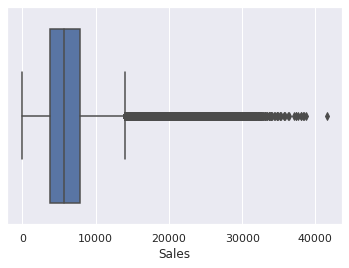

In [86]:
sns.boxplot(data_train.Sales)

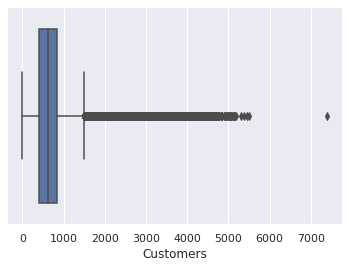

In [56]:
sns.boxplot(data_train.Customers)

### Treating outliers on training data

Using Interquartile Ranges we will remove outliers from the training dataset

In [125]:
# Removing outliers from training dataset using Sales as a parameter
data_clean_sales = Outlier(data_train_clean).iqr_univariate(data_train_clean.Sales)

# Removing outliers from training dataset using Customers as a parameter
data_train_clean = Outlier(data_clean_sales).iqr_univariate(data_clean_sales.Customers)
data_train_clean.shape

(769484, 8)

## Seasonality analysis of training set

### Data extraction

In [196]:
data_train_clean['year'] = data_train_clean.index.year
data_train_clean['month'] = data_train_clean.index.month
data_train_clean['day'] = data_train_clean.index.day
data_train_clean['weekOfYear'] = data_train_clean.index.weekofyear
data_train_clean['dayOfWeek'] = data_train_clean.index.dayofweek

# is weekEnd day: True, not weekEnd day: False
data_train_clean['weekEnd'] = np.array([ (day in [5,6]) for day in data_train_clean.index.dayofweek])

# beginning of month, mid month and ending of month
# beginning : 0, mid : 1, ending : 2
def month_range(day):
    if (day in range(10)): return 0
    if (day in range(10, 20)): return 1
    return 2

data_train_clean['monthRange'] = data_train_clean['day'].apply(month_range)

# Sales per customer
data_train_clean['salePerCustomer'] = data_train_clean['Sales']/data_train_clean['Customers']
data_train_clean['salePerCustomer'].describe()

count    769484.000000
mean          9.572683
std           2.092959
min           2.752415
25%           8.001299
50%           9.340206
75%          10.933804
max          51.694444
Name: salePerCustomer, dtype: float64

There is a minimum of 2 and a maximum of 51.6 sales per customer. By average there is 9.6 sales per customer.

### Joining store and train datasets

In [290]:
data_train_store = pd.merge(data_train_clean.reset_index(), data_store, how = 'inner', on = 'Store').set_index("Date")
data_train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,...,weekEnd,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263.0,555,1,1,0,1,2015,7,...,False,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2015-07-30,1,4,5020.0,546,1,1,0,1,2015,7,...,False,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2015-07-29,1,3,4782.0,523,1,1,0,1,2015,7,...,False,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2015-07-28,1,2,5011.0,560,1,1,0,1,2015,7,...,False,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2015-07-27,1,1,6102.0,612,1,1,0,1,2015,7,...,False,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### Analyzing sales per store type

In [134]:
data_train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,428222.0,6381.755491,2425.186883,0.0,4592.0,6075.0,7903.0,14049.0
b,5158.0,5777.087437,1886.744114,0.0,4422.0,5606.5,7047.5,12470.0
c,106854.0,6514.357946,2261.597872,0.0,4830.0,6237.0,7957.0,14049.0
d,254823.0,6673.712357,2254.805596,0.0,5029.0,6350.0,8022.0,14048.0


In [202]:
data_train_store.groupby('StoreType')['Customers', 'Sales'].sum()

/home/ns/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Customers,Sales
StoreType,,
a,290789357,2552702272
b,4187022,23483417
c,76619082,651563569
d,147137933,1635535671


Store type `A` has leading in customer and sales. Store type `D` follows second. Store type `B` has low customers and sales comparatively

### Time series per store type

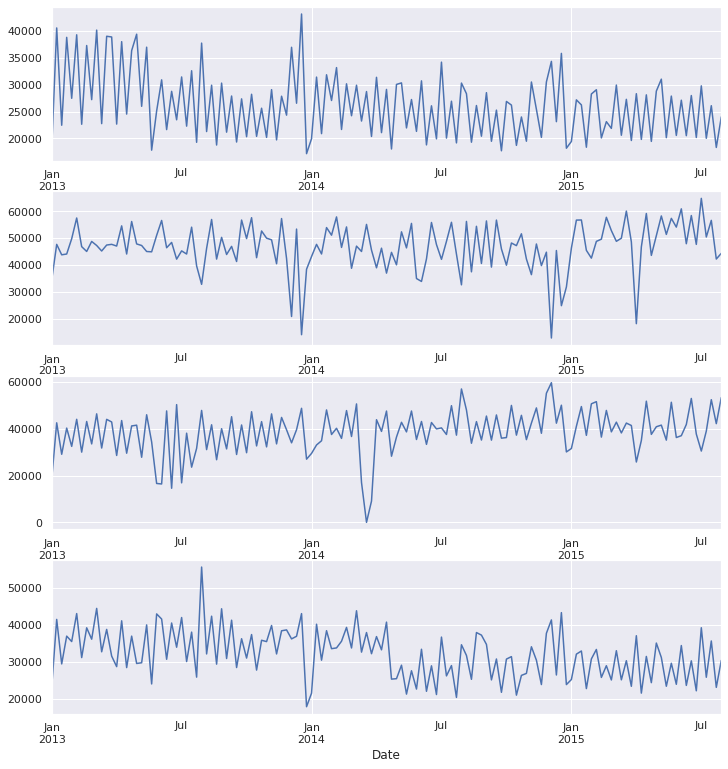

In [304]:
data_train_store['Sales'] = data_train_store['Sales'] * 1.0

data_train_type_a = data_train_store[data_train_store.StoreType == 'a']
data_train_type_b = data_train_store[data_train_store.StoreType == 'b']
data_train_type_c = data_train_store[data_train_store.StoreType == 'c']
data_train_type_d = data_train_store[data_train_store.StoreType == 'd']

def sample_stores(data): 
    return data[data.Store == data.sample()['Store'].values[0]]

sales_a = sample_stores(data_train_type_a)['Sales']
sales_b = sample_stores(data_train_type_b)['Sales']
sales_c = sample_stores(data_train_type_c)['Sales']
sales_d = sample_stores(data_train_type_d)['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

sales_a.resample('W').sum().plot(ax = ax1)
sales_b.resample('W').sum().plot(ax = ax2)
sales_c.resample('W').sum().plot(ax = ax3)
sales_d.resample('W').sum().plot(ax = ax4)

### Yearly trend per store type

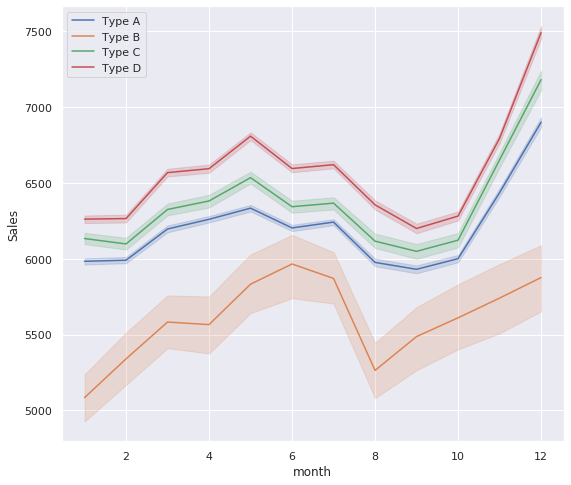

In [310]:
plt.subplots(figsize = (9, 8))
sns.lineplot(x = data_train_type_a.month, y = data_train_type_a.Sales, label="Type A")
sns.lineplot(x = data_train_type_b.month, y = data_train_type_b.Sales, label="Type B")
sns.lineplot(x = data_train_type_c.month, y = data_train_type_c.Sales, label="Type C")
sns.lineplot(x = data_train_type_d.month, y = data_train_type_d.Sales, label="Type D")

### Overall sales trend

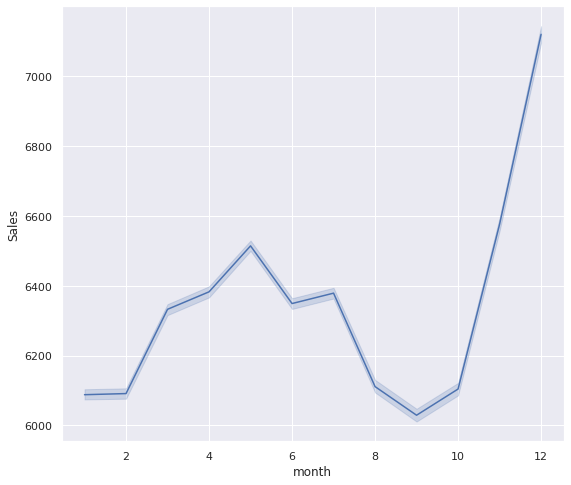

In [311]:
plt.subplots(figsize = (9, 8))
sns.lineplot(x = data_train_clean.month, y = data_train_clean.Sales)

Overall sales increases from Janulary through May and drop from May to September. It has a hgih rate increse from September to December. He highest sales in in December and the lowest sales are in September.

### Sales before, after and during christmas

Text(0.5, 1.0, 'X-mas sale comparison')

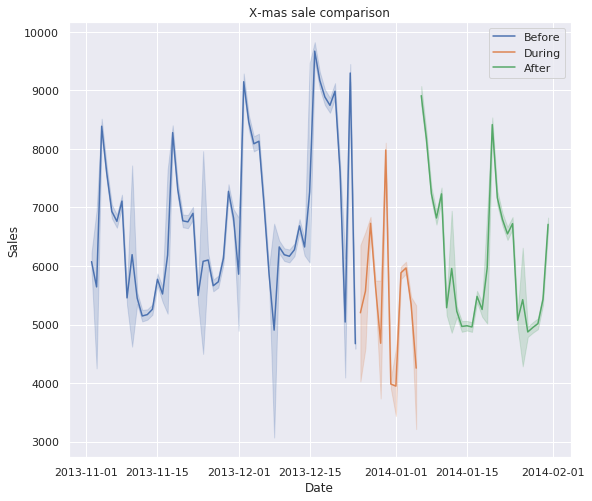

In [306]:
before_xmas = data_train_clean[(data_train_clean.index > '2013-11-01') & (data_train_clean.index < '2013-12-25') ].Sales
during_xmas = data_train_clean[(data_train_clean.index >= '2013-12-25') & (data_train_clean.index <= '2014-01-05') ].Sales
after_xmas = data_train_clean[(data_train_clean.index > '2014-01-05') & (data_train_clean.index < '2014-02-01') ].Sales

plt.subplots(figsize = (9, 8))

sns.lineplot(x = before_xmas.index, y = before_xmas, label='Before')
sns.lineplot(x = during_xmas.index, y = during_xmas, label='During')
sns.lineplot(x = after_xmas.index, y = after_xmas, label='After').set_title('X-mas sale comparison')

The sale cumulatively increase until christmas then stayed low during christmas for almost two weeks and raised again and continue the usual sales rate. The up and downs in the graph is due to weekend effect.

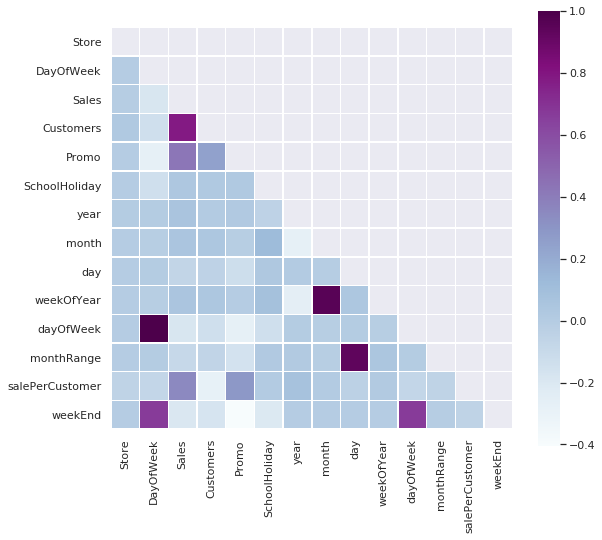

In [315]:
corr_all = data_train_clean.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (9, 8))

sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

From the above correlation we can see Customers are strongly correlated with Sales. And Promo and weekEnd are negatively correlated, this means at weekends there is less or no promo.

### Promotion impact on sales and customers per store type

/home/ns/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


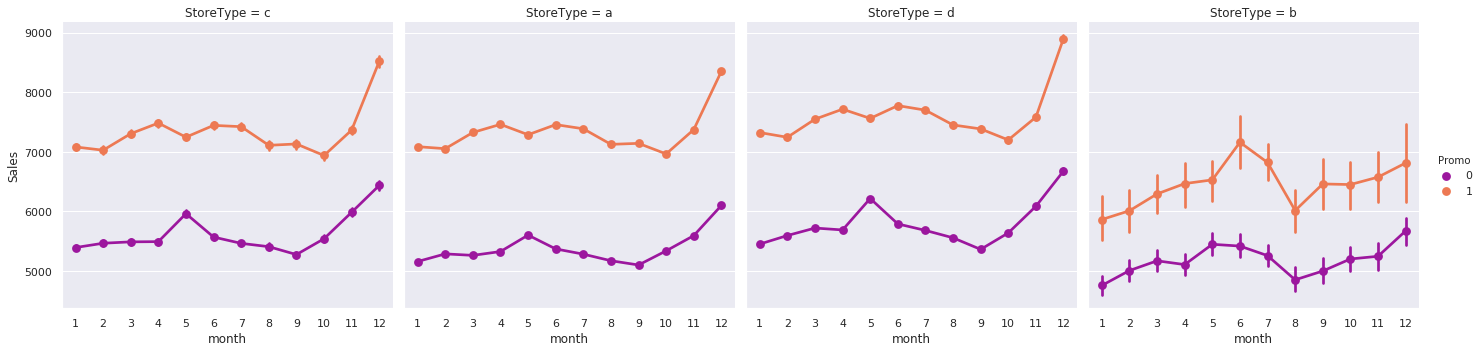

In [320]:
# sns.factorplot(data = data_train_store, x = 'Month', y = 'Sales', col='Promo', hue='Promo')
sns.factorplot(data = data_train_store, x = 'month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
#                row = 'Promo', # per promo in the store in rows
               title='Promotion impact on sales per store types')

Sales is significantly increased when a store has a promotion

/home/ns/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


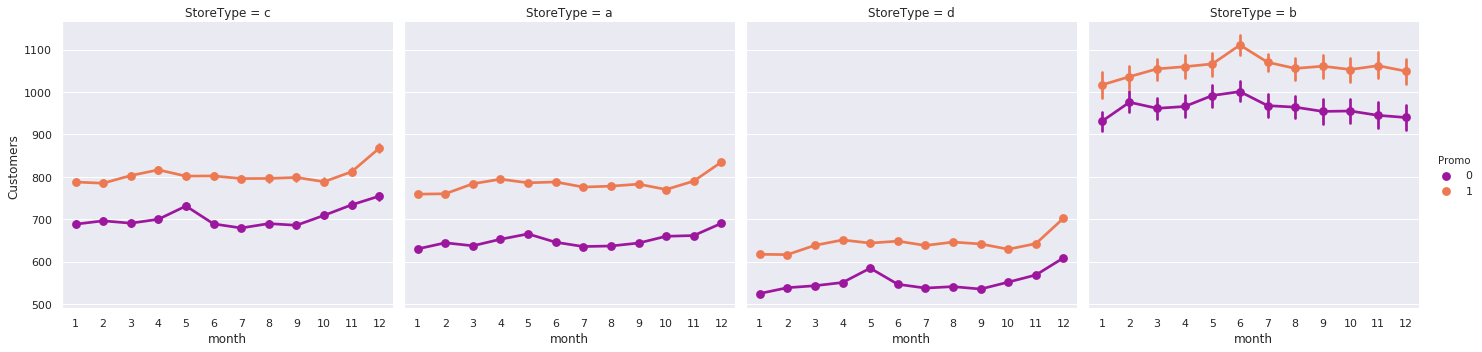

In [323]:
sns.factorplot(data = data_train_store, x = 'month', y = 'Customers', 
               col = 'StoreType', # per store type in cols
               palette = 'plasma', 
               hue='Promo', 
               title="Promotion impact on customers per store types")

Here as well customer numbers are increase with promotion. The above sales graph and this customer graph has similar plotting. We can take sales and customers as a highly correlated variables

### Sales during the weekends

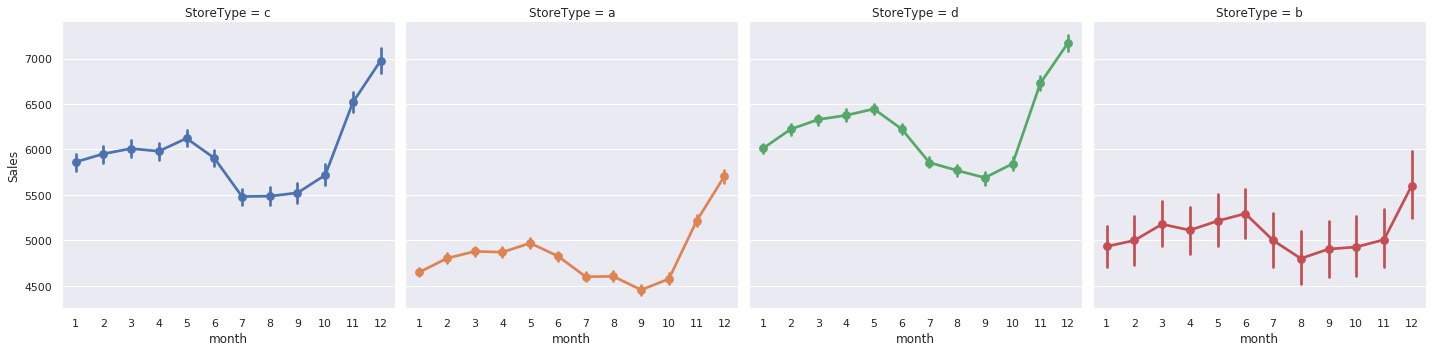

In [325]:
weekend_open = data_train_store[data_train_store.DayOfWeek.isin([6,7])]
sns.factorplot(data = weekend_open, x = 'month', y = 'Sales', col='StoreType', hue='StoreType')

### Assortment impact on sales

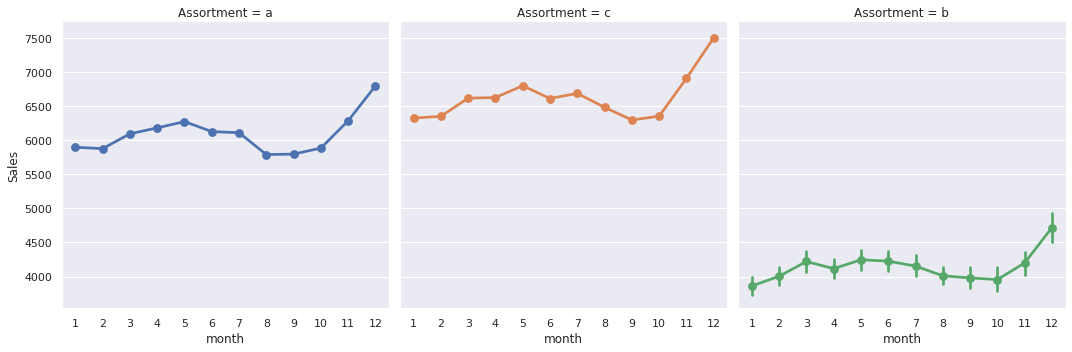

In [327]:
sns.factorplot(data = data_train_store, x = 'month', y = 'Sales', col='Assortment', hue='Assortment')

Assertment c (extended) has the highest sales and assertment b (extra) has a very low sales in comparison. Assortment a (basic) is a little bit down from assertment c. A more profitable store types are deep and wide assorted types.

### Competitors distance impact on sales

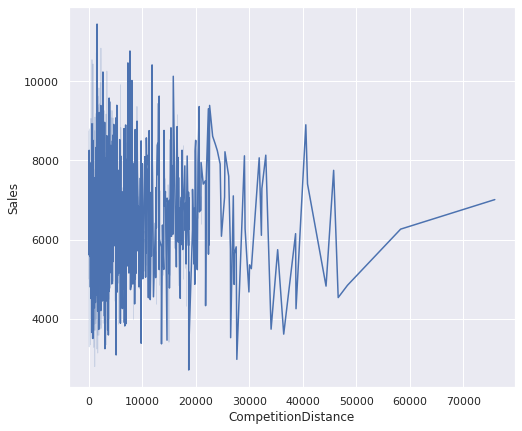

In [328]:
a = data_train_store.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.lineplot(x = a['CompetitionDistance'], y=a['Sales'])

It is hard to get a meaningful insight from the graph. Despite that, we can see stores with high sales happen where the distance is small. This indicate that the stores are located at city center or around hospitals where there are more customers. Although distance matter, stores located at city centers will still get more sales regardless of competitors distance because there are more customers at the city center.